## <font color = 'red'>AD-7</font>
#### V.Abhiram - 2111cs010016 <br> B.Anudeep Reddy - 2111cs010049 <br> P.Abhinav Reddy - 2111cs010011 <br> Chand Pasha  - 2111cs010021
### Title : Social Media Ads Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing

#### 1)How do you load the dataset into your preferred programming environment? 

In [2]:
path=os.path.abspath("")
file=path+"\Dataset\Social_Network_Ads.csv"
file

'D:\\AD-7(3-1)\\MLDS\\Dataset\\Social_Network_Ads.csv'

In [3]:
df=pd.read_csv(file)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0
...,...,...,...,...,...
397,15654296,Female,50.0,20000,1
398,15755018,Male,36.0,33000,0
399,15594041,Female,49.0,36000,1
400,15724858,Male,27.0,90000,0


In [4]:
print(df.shape)

(402, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          402 non-null    int64  
 1   Gender           402 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  402 non-null    int64  
 4   Purchased        402 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0


In [7]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
397,15654296,Female,50.0,20000,1
398,15755018,Male,36.0,33000,0
399,15594041,Female,49.0,36000,1
400,15724858,Male,27.0,90000,0
401,15750335,Female,37.0,57000,0


In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

#### 2)How do you generate summery statistics for numerical variables such as mean, median, and standard deviation ?

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.020000e+02,400.00000,402.000000,402.000000
mean,1.569177e+07,37.57000,69761.194030,0.355721
std,7.155865e+04,10.43635,34032.809263,0.479328
min,1.556669e+07,18.00000,15000.000000,0.000000
25%,1.562755e+07,29.00000,43000.000000,0.000000
50%,1.569442e+07,37.00000,70000.000000,0.000000
75%,1.575034e+07,46.00000,88000.000000,1.000000
max,1.581524e+07,60.00000,150000.000000,1.000000


#### 3)How can you display top 10 rows of the dataset to get a quick overview?

In [10]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0
5,15728773,Male,27.0,58000,0
6,15598044,Female,27.0,84000,0
7,15694829,Female,32.0,150000,1
8,15600575,Male,25.0,33000,0
9,15727311,Female,35.0,65000,0


In [11]:
df.drop(['User ID'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [13]:
df.isnull().sum()

Gender             0
Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
rows_with_null= df[df.isnull().any(axis=1)]
rows_with_null

,Gender,Age,EstimatedSalary,Purchased
349,Male,NaN,61000,0
355,Male,NaN,34000,1


In [15]:
columns_to_check=['Age']
rows_with_null_specific=df[df[columns_to_check].isnull().any(axis=1)]
rows_with_null_specific

,Gender,Age,EstimatedSalary,Purchased
349,Male,NaN,61000,0
355,Male,NaN,34000,1


C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


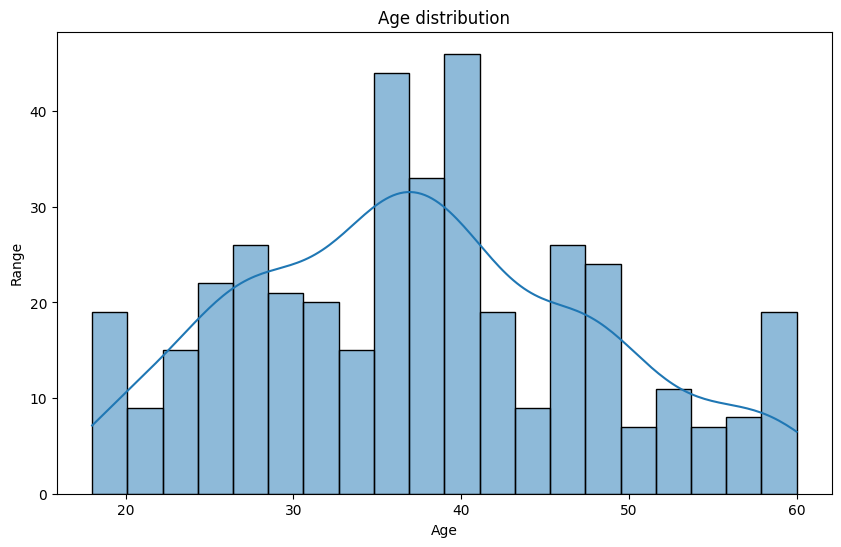

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Range')
plt.show()

In [17]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [18]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
df['Age']=df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           402 non-null    object
 1   Age              402 non-null    int32 
 2   EstimatedSalary  402 non-null    int64 
 3   Purchased        402 non-null    int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 11.1+ KB


In [20]:
duplicate_rows=df[df.duplicated()]
duplicate_rows

,Gender,Age,EstimatedSalary,Purchased
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [21]:
all_duplicate_rows=df[df.duplicated(keep=False)]
all_duplicate_rows

,Gender,Age,EstimatedSalary,Purchased
13,Male,32,18000,0
26,Male,49,28000,1
28,Male,29,43000,0
34,Male,27,90000,0
52,Female,29,83000,0
74,Male,32,18000,0
81,Male,39,42000,0
94,Female,29,83000,0
115,Male,40,57000,0
116,Male,35,75000,0


In [22]:
df=df.drop_duplicates(keep='first')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [23]:
df.describe()

,Age,EstimatedSalary,Purchased
count,381.000000,381.000000,381.000000
mean,37.524934,70396.325459,0.367454
std,10.515779,34561.963991,0.482746
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [24]:
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vkram\AppData\Local\Temp\ipykernel_10300\2882763660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])


In [25]:
df.corr(method='pearson')

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.100078,-0.039804,-0.046247
Age,-0.100078,1.000000,0.177690,0.622332
EstimatedSalary,-0.039804,0.177690,1.000000,0.375150
Purchased,-0.046247,0.622332,0.375150,1.000000


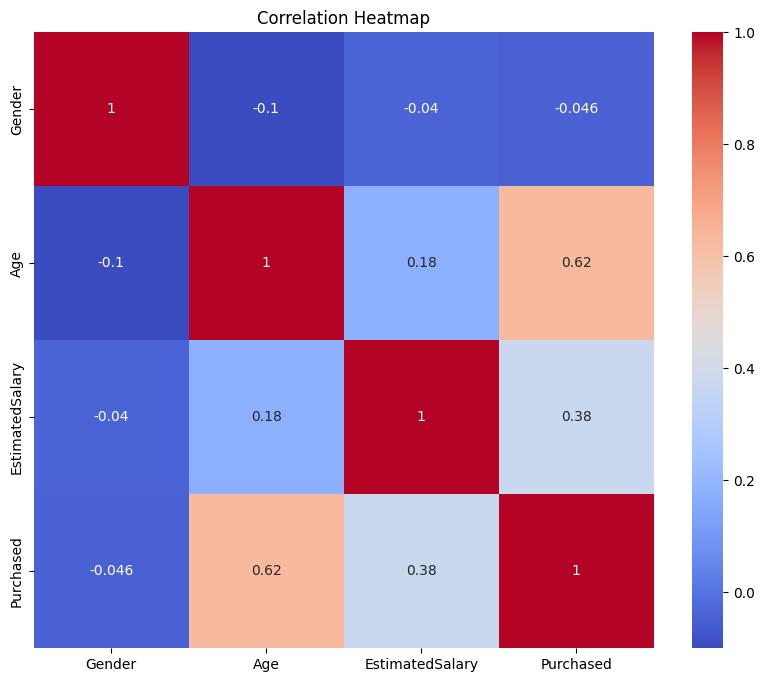

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
df1 = df[['Age','EstimatedSalary','Gender']] 
df1

,Age,EstimatedSalary,Gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


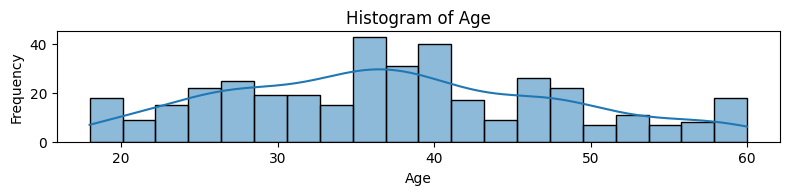

C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


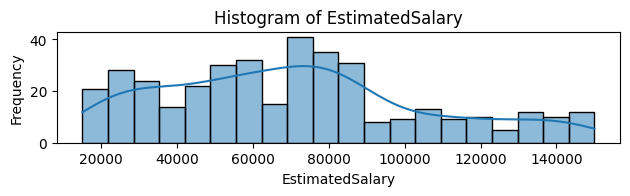

C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


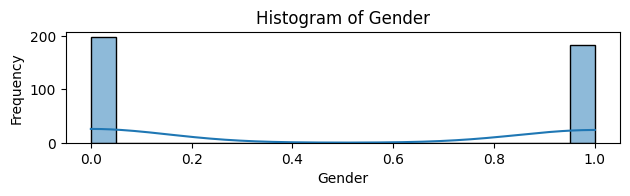

In [28]:
# Create subplots for the histograms
plt.figure(figsize=(8, 5))
for i, var in enumerate(df1, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[var], bins=20, kde=True) 
    plt.title(f'Histogram of {var}') 
    plt.xlabel(var) 
    plt.ylabel('Frequency') 
    plt.tight_layout() 
    plt.show()

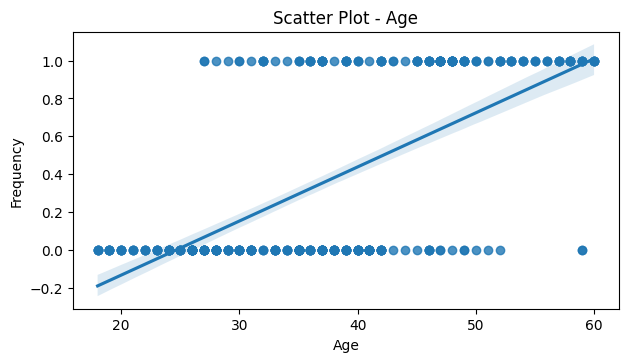

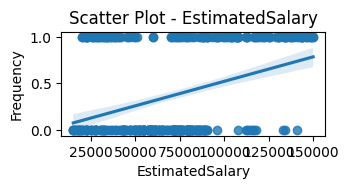

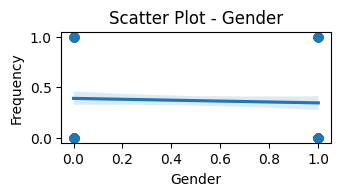

In [29]:

plt.figure(figsize=(12,10)) 
for i, var in enumerate(df1, 1): 
    plt.subplot(3, 2, i) 
    sns.regplot(x=df[var], y='Purchased', data=df) 
    plt.title(f'Scatter Plot - {var}') 
    plt.xlabel(var) 
    plt.ylabel('Frequency') 
    plt.tight_layout() 
    plt.show()

C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vkram\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


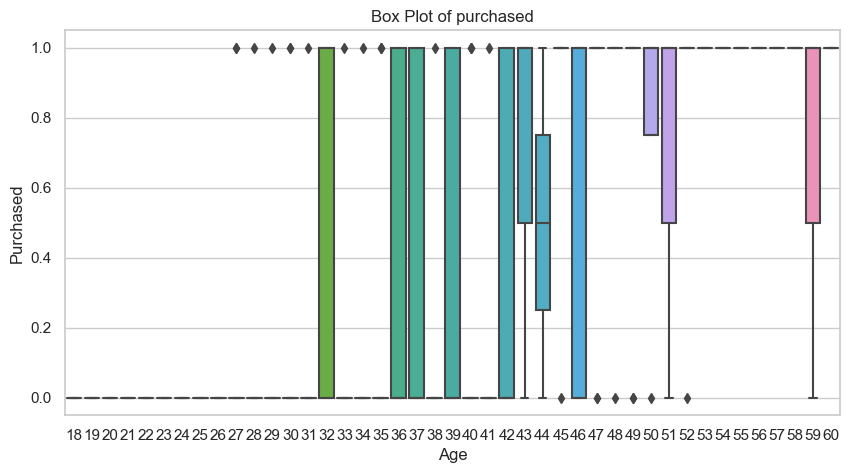

In [30]:
# Create a box plot
# Set the style for seaborn 
sns.set(style="whitegrid") 
# Create a box plot using seaborn 
plt.figure(figsize=(10, 5)) 
sns.boxplot(x='Age', y='Purchased', data=df) 
# Add labels and title 
plt.xlabel('Age') 
plt.ylabel('Purchased') 
plt.title('Box Plot of purchased') 
# Show the plot 
plt.show()

In [31]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [33]:
x = df[['Age','EstimatedSalary','Gender']]
x


,Age,EstimatedSalary,Gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [34]:
y = df[['Purchased']]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (304, 3)
X_test: (77, 3)


In [36]:
# from sklearn.preprocessing import StandardScaler

# # Standardize the features (optional but recommended)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

RandomForestClassifier(random_state=42)

In [38]:
model.fit(X_train, y_train)

C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

RandomForestClassifier(random_state=42)

In [39]:
RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions on the test data
y_pred = model.predict(X_test)

C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.86
Confusion Matrix:
[[43  9]
 [ 2 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        52
           1       0.72      0.92      0.81        25

    accuracy                           0.86        77
   macro avg       0.84      0.87      0.85        77
weighted avg       0.88      0.86      0.86        77



C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

In [42]:
x.tail()

,Age,EstimatedSalary,Gender
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1
399,49,36000,0


In [43]:
y.tail()

,Purchased
395,1
396,1
397,1
398,0
399,1


In [44]:
# Make predictions on the New data
Age = 36
EstimatedSalary = 33000
Gender =1

y_pred = model.predict([[Age, EstimatedSalary, Gender]])

print(f"Predicted Value: {round(y_pred[0])}")

Predicted Value: 0


C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
import pickle 
pickle.dump(model, open("Social_media_ads.pkl", "wb"))

In [46]:
model = pickle.load(open("Social_media_ads.pkl", "rb"))
Gender=1
Age=46
EstimatedSalary=41000
y_pred = model.predict([[Age,EstimatedSalary, Gender]])
print(f"Predicted : {y_pred[0]}")

Predicted : 1


C:\Users\vkram\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
